 # Feature Scaling and choosing learning rate (Multiple values)
 gradiant descent for linear regression with multiple variables

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from amro import get_housing_data,gradient_descent
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc


Problem Statement : predcit housing price based on multiple features <br><br>
<img src="./Images/b17.png">


In [299]:
data= np.loadtxt("./data/houses.txt",delimiter=',',skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]

"""now X_tain , y_train are loaded"""
X_features=np.array(["size(sqft)","bedrooms","floors","age"])
num_of_features=X_features.shape[0]


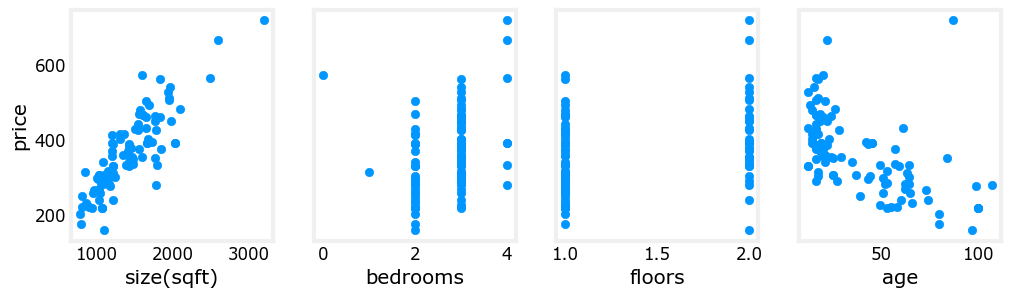

In [300]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3),sharey=True)
# 1 row  4 columns
"""
fig contains all subplots objects
ax contains axis of evey object
width =12 inch height = 3 inch
all subplots share the same y axis
"""

for i in range(num_of_features):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("price")

plt.show()

In [301]:
def compute_cost(X,y,w,b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        cost += (np.dot(w,X[i])+b-y[i])**2

    cost = cost / (2*m)
    return cost


In [302]:
def compute_gradient(X,y,w,b):
    d_dw = np.zeros(X.shape[1])
    d_db = 0
    m = X.shape[0]
    for i in range(m):
        err = (np.dot(w,X[i])+b)-y[i]
        # d_dw = d_dw + np.dot(err,X[i]) #***** no need dot product when multipying scalar * vector
        d_dw = d_dw + (err*X[i])
        d_db = d_db + err
    d_dw = d_dw/m
    d_db = d_db/m
    return d_dw,d_db

In [303]:
def gradient_descent(X,y,w_in,b_in,alpha,iteration):
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    J_history={
        "cost":[],
        "params":[],
        "grads":[],
        "iter":[],
        "w0":[]
    }
    
    for i in range(iteration):
        dj_dw,dj_db =compute_gradient(X,y,w,b)
        w = w - (alpha*dj_dw) 
        b = b - (alpha*dj_db)
        J_history["cost"].append(compute_cost(X, y, w, b))
        J_history["params"].append([w,b])
        J_history["grads"].append([dj_dw,dj_db])
        J_history["iter"].append(i)
        J_history["w0"].append(w[0])
        if i % math.ceil(iteration/10) == 0:
            print(f"iteration {i:4d} w equals {w} and b equals {b} , cost equals {J_history['cost'][-1]}")
    return w,b,J_history

iteration    0 w equals [5.46265788e-01 9.95942280e-04 5.13326620e-04 1.22787176e-02] and b equals 0.00035952452 , cost equals 95588.39970758409
iteration    1 w equals [-0.08770797 -0.00017404 -0.00010024 -0.00340943] and b equals -4.848224602614789e-05 , cost equals 128212.81399257759
iteration    2 w equals [6.48129707e-01 1.16980959e-03 5.94094085e-04 1.33626697e-02] and b equals 0.0004343311422910404 , cost equals 172159.4395716454
iteration    3 w equals [-0.20586534 -0.00040393 -0.00022954 -0.00753799] and b equals -0.00011675376258223579 , cost equals 231357.56369595768
iteration    4 w equals [7.85333727e-01 1.40855459e-03 7.08607848e-04 1.52864608e-02] and b equals 0.0005321327668967897 , cost equals 311100.10294789757
iteration    5 w equals [-0.36503931 -0.00070908 -0.00039801 -0.0126361 ] and b equals -0.00021168665101911654 , cost equals 418516.8404551911
iteration    6 w equals [9.70142382e-01 1.73468462e-03 8.68578066e-04 1.83407120e-02] and b equals 0.00066090525373793

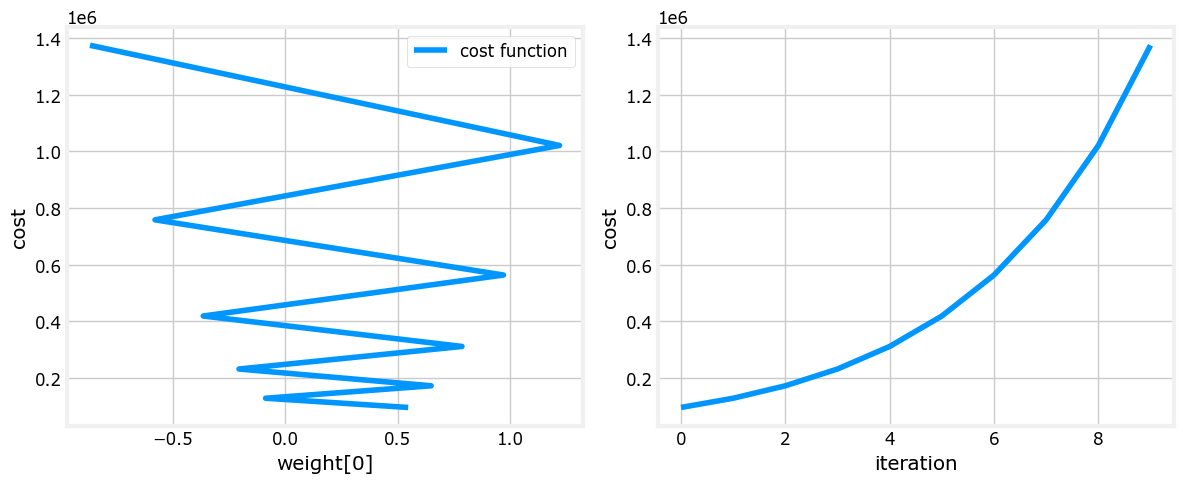

In [304]:
# ******IMPORTANT********     try alpha = 9.9e-7 which is big   and alpha = 1e-7 which is small
# ******IMPORTANT********     try iteration = 1000       and iteration = 10 
w,b,j_history = gradient_descent(X_train,y_train,(np.zeros(4)),0,alpha=1e-7,iteration=10)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(j_history['w0'],j_history['cost'],label="cost function")
plt.xlabel("weight[0]")
plt.ylabel("cost")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(j_history['iter'],j_history['cost'])
plt.xlabel("iteration")
plt.ylabel("cost")
plt.grid(True)

plt.tight_layout()
plt.show()



# If Alhpa is too high What  happen ?
Cost will increas with each iteration and you will not be able to reach minimum<br><br>
No convergence <br><br>
<img src = ./Images/b20.png width =700>